In [3]:
import bs4
import urllib
import urllib3
#import urllib2
import re
import pandas as pd
import numpy as np
import io
import geocoder
%run scripts/python/standardize.py

In [363]:
kc_lic = pd.read_json('https://data.kcmo.org/resource/rmk6-sicm.json')

In [358]:
ind_lic = pd.read_json("https://www.ci.independence.mo.us/Open/businesslicense/LicenseJSON")

In [4]:
kc_lic = pd.read_csv('https://data.kcmo.org/resource/rmk6-sicm.csv')

In [7]:
check_na(kc_lic)

value,False,True
variable,,
:@computed_region_9t2m_phkm,858,142
:@computed_region_kk66_ngf4,858,142
:@computed_region_my34_vmp8,897,103
:@computed_region_w4hf_t6bp,897,103
business_dba,1000,0
business_type,1000,0
location_1,906,94
location_1_city,0,1000
location_1_location,999,1


In [359]:
ind_lic.head(2)

,AccountNumber,AccountStatus,AccountStatusDescription,Address,BusinessDescription,BusinessName,City,CouncilDistrict,Date,EffectiveDate,EmployeeRange,HomeBasedBusiness,Lat,Long,NumberOfEmployees,SIC,StartDate,State,Status,ZIPcode
0,71127,LR,Late Renewal,11303 E TRUMAN RD,Auto Repair & Clean Up,AUTOMOTIVE ART,INDEPENDENCE,1,2012-11-16,9/18/2015,0-10,NO,39.094574,-94.444183,0,7538F,9/18/2007,MO,RENEWAL,64052
1,67132,RE,Renewal,9020 E US 24 HWY C,Auto Repair/Used Auto Sales,EXCEL AUTO,INDEPENDENCE,1,2012-07-06,7/31/2016,0-10,NO,39.106327,-94.471840,0,7538A,7/24/2006,MO,RENEWAL,64053


In [360]:
ind_lic = ind_lic[ind_lic.Lat != 0].rename(columns={'Lat':'latitude','Long':'longitude'})

In [361]:
ind_lic.head(2)

,AccountNumber,AccountStatus,AccountStatusDescription,Address,BusinessDescription,BusinessName,City,CouncilDistrict,Date,EffectiveDate,EmployeeRange,HomeBasedBusiness,latitude,longitude,NumberOfEmployees,SIC,StartDate,State,Status,ZIPcode
0,71127,LR,Late Renewal,11303 E TRUMAN RD,Auto Repair & Clean Up,AUTOMOTIVE ART,INDEPENDENCE,1,2012-11-16,9/18/2015,0-10,NO,39.094574,-94.444183,0,7538F,9/18/2007,MO,RENEWAL,64052
1,67132,RE,Renewal,9020 E US 24 HWY C,Auto Repair/Used Auto Sales,EXCEL AUTO,INDEPENDENCE,1,2012-07-06,7/31/2016,0-10,NO,39.106327,-94.471840,0,7538A,7/24/2006,MO,RENEWAL,64053


In [362]:
kc_lic.head(2)

,:@computed_region_9t2m_phkm,:@computed_region_kk66_ngf4,:@computed_region_my34_vmp8,:@computed_region_w4hf_t6bp,business_dba,business_type,location_1,location_1_location,longitude,latitude
5,3.0,6.0,7.0,94.0,ONE STOP SHOP,PACKAGE,"{'type': 'Point', 'coordinates': [-94.514571, ...",5805 17TH STREET 64126-,-94.514571,39.090294
6,4.0,32.0,7.0,50.0,MISSOURI TITLE LOANS 2,SHORT TERM LOAN,"{'type': 'Point', 'coordinates': [-94.585915, ...",3731 MAIN STREET 64111-,-94.585915,39.059078


Entry error has led to null values in the Kansas City dataset

At this point we can see that the Kansas City dataset has latitude and longitude embeded in their location_1 column

Kansas City lists active licenses, while Independence lists all

In [364]:
kc_lic = kc_lic[kc_lic.location_1.notnull()]

In [365]:
kc_lic.iloc[1][6]['coordinates'][0]

-94.585915

In [367]:
kc_lic['latitude']= kc_lic.location_1.apply(lambda x: get_lat_long(x,'latitude'))
kc_lic['longitude']= kc_lic.location_1.apply(lambda x: get_lat_long(x,'longitude'))

In [368]:
kc_lic.head(2)

,:@computed_region_9t2m_phkm,:@computed_region_kk66_ngf4,:@computed_region_my34_vmp8,:@computed_region_w4hf_t6bp,business_dba,business_type,location_1,location_1_location,latitude,longitude
5,3.0,6.0,7.0,94.0,ONE STOP SHOP,PACKAGE,"{'type': 'Point', 'coordinates': [-94.514571, ...",5805 17TH STREET 64126-,39.090294,-94.514571
6,4.0,32.0,7.0,50.0,MISSOURI TITLE LOANS 2,SHORT TERM LOAN,"{'type': 'Point', 'coordinates': [-94.585915, ...",3731 MAIN STREET 64111-,39.059078,-94.585915


In [369]:
data_to_csv(kc_lic[['business_dba','business_type','location_1','location_1_location','latitude','longitude']], 'kc_lic.csv')

In [224]:
%matplotlib inline

In [217]:
jackson = gp.read_file('jackson_co.geojson')


In [218]:
jackson.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US29095,1.565588e+09,30483965.0,095,00758502,29095,06,Jackson,29,"POLYGON ((-94.608334 38.981806, -94.6083049915..."


In [274]:
jackson.loc[0]['ALAND']

1565587846.0

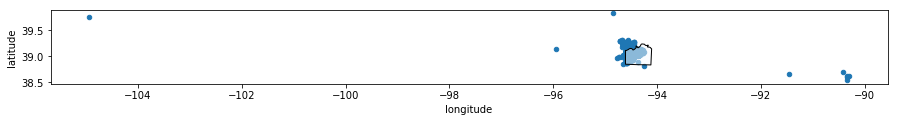

In [370]:
base = jackson.plot(column='ALAND', cmap='Blues', figsize=(15,15) )
kc_lic.plot(ax=base,kind='scatter', x='longitude', y='latitude', figsize=(15,15))
ind_lic.plot(ax=base,kind='scatter', x='longitude', y='latitude', figsize=(15,15))

In [392]:
print(len(ind_lic[ind_lic['AccountStatus']=='AC']),len(kc_lic))

1378 906


In [391]:
data_to_csv(ind_lic[ind_lic['AccountStatus']=='AC'], 'ind_lic.csv')

In [404]:
soup = get_soup('https://data.kcmo.org/resource/rmk6-sicm.json')

/Users/summerfellow/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/Users/summerfellow/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [61]:
ind_lic = pd.read_csv('ind_lic.csv')

In [62]:
kc_lic = pd.read_csv('kc_lic.csv')

In [63]:
pd.options.display.max_columns = 100
kc_lic = kc_lic.rename(columns={'location_1_location':'address'})

In [64]:
kc_lic = kc_lic[['business_dba','business_type','address','latitude','longitude']]

In [65]:
ind_lic[['BusinessName','BusinessDescription','Address','City','ZIPcode','latitude','longitude']].head()

,BusinessName,BusinessDescription,Address,City,ZIPcode,latitude,longitude
0,MISSOURI FREEDOM FUND,Jewelry Sales/Design/Repair,716 N LIBERTY ST,INDEPENDENCE,64050,39.097321,-94.434074
1,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
2,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
3,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
4,A SECRET GARDEN,Gift/Novelty/Specialty Items,11014 E WINNER RD,INDEPENDENCE,64052,39.087975,-94.447609


In [67]:
kc_lic['zip_code'] = kc_lic.address.apply(lambda x: get_zip(x))

In [68]:
kc_lic['address'] = kc_lic.address.apply(lambda x: strip_address(x))

In [70]:
ind_lic = ind_lic[['BusinessName','BusinessDescription','Address','City','ZIPcode','latitude','longitude']].rename(columns = {'BusinessName':'business_dba', 'BusinessDescription':'business_type','Address':'address','City':'city','ZIPcode':'zip_code'})

In [72]:
ind_lic.head()

,business_dba,business_type,address,city,zip_code,latitude,longitude
0,MISSOURI FREEDOM FUND,Jewelry Sales/Design/Repair,716 N LIBERTY ST,INDEPENDENCE,64050,39.097321,-94.434074
1,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
2,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
3,A & A AUTO SALES & SERVICE,Auto/Truck Sales/Used,9514 E 23RD ST S C,INDEPENDENCE,64052,39.081612,-94.466927
4,A SECRET GARDEN,Gift/Novelty/Specialty Items,11014 E WINNER RD,INDEPENDENCE,64052,39.087975,-94.447609


In [73]:
kc_lic['city'] = 'Kansas City'

In [74]:
jackson_lic = pd.concat([kc_lic,ind_lic], axis =0)

In [76]:
data_to_csv(jackson_lic,'jackson_lic.csv')

In [75]:
jackson_lic.head()

,address,business_dba,business_type,city,latitude,longitude,zip_code
0,5805 17TH STREET,ONE STOP SHOP,PACKAGE,Kansas City,39.090294,-94.514571,64126
1,3731 MAIN STREET,MISSOURI TITLE LOANS 2,SHORT TERM LOAN,Kansas City,39.059078,-94.585915,64111
2,1823 39TH STREET,"JIMMY'S JIGGER/JAZZ, A LOUISIANA KICTHEN",RESTAURANT-BAR,Kansas City,39.057288,-94.606535,64111
3,2636 VAN BRUNT BLVD,7-ELEVEN STORE #18711C,PACKAGE,Kansas City,39.076321,-94.520576,64127
4,1700 E 18TH STREET,KANSAS CITY BLUES JUKE HOUSE,RESTAURANT-BAR,Kansas City,39.091195,-94.562012,64108
